In [2]:
import pandas as pd
import numpy as np
% pylab inline  
import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Import train and test file
train = pd.read_csv('B:/Case studies/Technex/train.csv')
test = pd.read_csv('B:/Case studies/Technex/test.csv')

In [4]:
train.head()

,LOAN_ID,AMOUNT,DUE_MORTGAGE,VALUE,REASON,OCC,TJOB,DCL,CLT,CL_COUNT,RATIO,CONVICTED,VAR_1,VAR_2,VAR_3,DEFAULTER
0,3682648,15100,71168.0,97480.0,1.0,0.0,9.0,0.0,119.166667,19.0,NaN,0,0,1,2.0095,1
1,3682649,21100,81747.0,109840.0,1.0,0.0,NaN,0.0,174.786162,24.0,40.067527,0,0,1,1.2724,0
2,3682650,15900,94262.0,128414.0,1.0,3.0,4.0,NaN,242.736126,42.0,39.231892,1,0,2,1.4725,0
3,3682651,12900,110899.0,124480.0,1.0,2.0,7.0,0.0,204.900000,40.0,NaN,0,1,2,1.5701,1
4,3682652,24600,NaN,35523.0,0.0,0.0,21.0,0.0,84.111988,15.0,29.865634,0,0,1,1.5013,0


In [5]:
train.isnull().sum()

LOAN_ID           0
AMOUNT            0
DUE_MORTGAGE    318
VALUE            67
REASON          157
OCC             173
TJOB            309
DCL             337
CLT             187
CL_COUNT        130
RATIO           751
CONVICTED         0
VAR_1             0
VAR_2             0
VAR_3             0
DEFAULTER         0
dtype: int64

In [6]:
train[train['DEFAULTER'] == 1].isnull().sum()

LOAN_ID           0
AMOUNT            0
DUE_MORTGAGE     67
VALUE            63
REASON           23
OCC              13
TJOB             41
DCL              41
CLT              49
CL_COUNT         30
RATIO           463
CONVICTED         0
VAR_1             0
VAR_2             0
VAR_3             0
DEFAULTER         0
dtype: int64

In [7]:
train[(train['VALUE'].isnull()) & (train['RATIO'].isnull())]['DEFAULTER'].value_counts()

1    49
Name: DEFAULTER, dtype: int64

It is well clear from above code for all those values for which VALUE and RATIO are unknown we will get defaulters ony

In [8]:
pd.crosstab(train['VAR_1'],train['DEFAULTER'])

DEFAULTER,0,1
VAR_1,,
0,2628,505
1,174,102
2,52,46
3,5,25
4,4,11
5,3,3
6,3,5
7,0,3
8,0,4


In [9]:
pd.crosstab(train['CONVICTED'],train['DEFAULTER'])

DEFAULTER,0,1
CONVICTED,,
0,2372,592
1,497,115


In [10]:
# Removing Test id which is of no use
test.drop('TEST_ID',axis = 1,inplace = True)

In [11]:
# Value counts
for i in ['REASON','OCC','CONVICTED','DCL','DEFAULTER']:
    print(train[i].value_counts())
    print('_'*50)

1.0    2361
0.0    1058
Name: REASON, dtype: int64
__________________________________________________
0.0    1433
4.0     756
1.0     574
3.0     470
5.0     108
2.0      62
Name: OCC, dtype: int64
__________________________________________________
0    2964
1     612
Name: CONVICTED, dtype: int64
__________________________________________________
0.0     2545
1.0      383
2.0      140
3.0       74
4.0       49
5.0       20
6.0       14
7.0        6
8.0        3
10.0       2
15.0       1
11.0       1
12.0       1
Name: DCL, dtype: int64
__________________________________________________
0    2869
1     707
Name: DEFAULTER, dtype: int64
__________________________________________________


In [12]:
# value counts
for i in ['REASON','OCC','CONVICTED','DCL']:
    print(test[i].value_counts())
    print('_'*50)

1.0    1567
0.0     722
Name: REASON, dtype: int64
__________________________________________________
0.0    955
4.0    520
1.0    374
3.0    297
5.0     85
2.0     47
Name: OCC, dtype: int64
__________________________________________________
0    1977
1     407
Name: CONVICTED, dtype: int64
__________________________________________________
0.0     1634
1.0      271
2.0      110
3.0       55
4.0       29
5.0       18
6.0       13
7.0        7
8.0        2
13.0       1
11.0       1
Name: DCL, dtype: int64
__________________________________________________


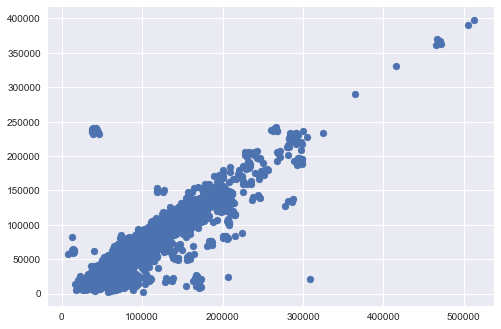

In [13]:
plt.scatter(train['VALUE'],train['DUE_MORTGAGE'])

Using log to deal with outliers and therefore we will get normal distribution.

(array([  667.,  1488.,   950.,   255.,   111.,    66.,    12.,    11.,
            9.,     7.]),
 array([  1200.,  10070.,  18940.,  27810.,  36680.,  45550.,  54420.,
         63290.,  72160.,  81030.,  89900.]),
 <a list of 10 Patch objects>)

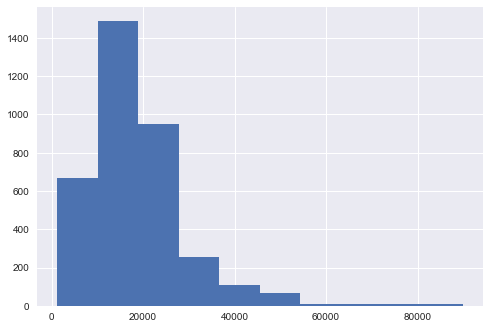

In [14]:
plt.hist(train['AMOUNT'])

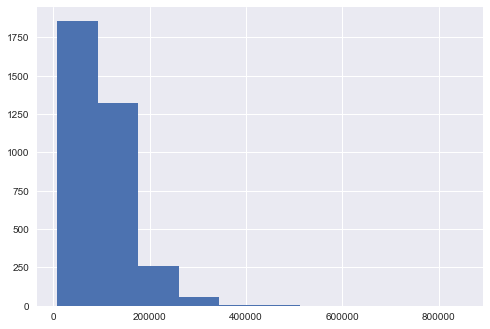

In [15]:
(train['VALUE']).hist()

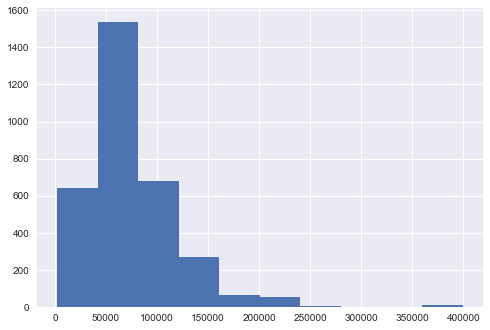

In [16]:
(train['DUE_MORTGAGE']).hist()

(array([    3.,    18.,    49.,   188.,   494.,   957.,  1100.,   563.,
          167.,    37.]),
 array([  7.09007684,   7.52171447,   7.95335211,   8.38498975,
          8.81662739,   9.24826503,   9.67990267,  10.11154031,
         10.54317794,  10.97481558,  11.40645322]),
 <a list of 10 Patch objects>)

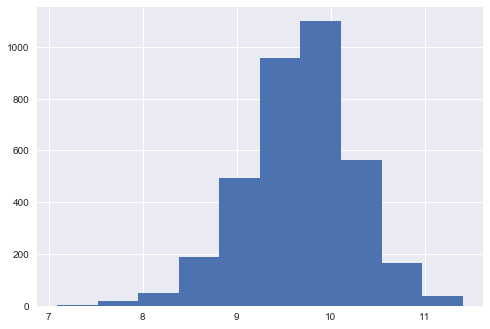

In [17]:
plt.hist(np.log(train['AMOUNT']))

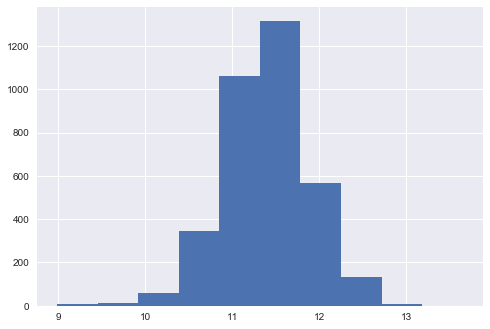

In [18]:
np.log(train['VALUE']).hist()

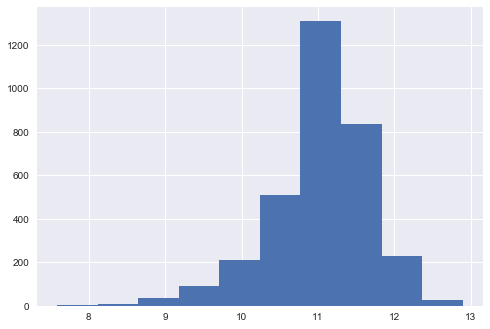

In [19]:
np.log(train['DUE_MORTGAGE']).hist()

In [20]:
# setting guess value for combing train and test
test['DEFAULTER'] = 1

In [21]:
# merging
combi = pd.concat([train,test])

In [22]:
combi.isnull().sum()

LOAN_ID            0
AMOUNT             0
DUE_MORTGAGE     518
VALUE            112
REASON           252
OCC              279
TJOB             515
DCL              580
CLT              308
CL_COUNT         222
RATIO           1267
CONVICTED          0
VAR_1              0
VAR_2              0
VAR_3              0
DEFAULTER          0
dtype: int64

In [23]:
# Correlation
combi.corr()

,LOAN_ID,AMOUNT,DUE_MORTGAGE,VALUE,REASON,OCC,TJOB,DCL,CLT,CL_COUNT,RATIO,CONVICTED,VAR_1,VAR_2,VAR_3,DEFAULTER
LOAN_ID,1.000000,0.019023,-0.017103,-0.005701,-0.006836,-0.005867,-0.001498,0.015087,-0.013524,0.008266,0.012663,-0.003106,0.013870,-0.007588,-0.009381,0.669574
AMOUNT,0.019023,1.000000,0.228595,0.335393,0.161406,0.093876,0.105728,-0.035144,0.088540,0.072631,0.084735,0.016344,0.006996,0.055619,-0.002921,-0.024485
DUE_MORTGAGE,-0.017103,0.228595,1.000000,0.875666,0.027596,0.339060,-0.088480,-0.001044,0.140047,0.323631,0.154939,0.003814,-0.049809,0.033954,0.002271,-0.024469
VALUE,-0.005701,0.335393,0.875666,1.000000,0.003989,0.341063,0.007759,-0.014103,0.171238,0.269149,0.132174,0.014295,-0.042602,0.008236,-0.006553,-0.017252
REASON,-0.006836,0.161406,0.027596,0.003989,1.000000,-0.031022,-0.051813,-0.006185,-0.058201,0.116218,0.057394,0.014980,0.007368,0.127373,-0.006337,-0.016572
OCC,-0.005867,0.093876,0.339060,0.341063,-0.031022,1.000000,-0.040466,0.023406,0.082103,0.203929,-0.039253,0.000474,-0.023708,-0.028334,0.024116,-0.009579
TJOB,-0.001498,0.105728,-0.088480,0.007759,-0.051813,-0.040466,1.000000,0.038153,0.201718,0.024838,-0.055891,-0.008691,-0.060193,-0.058327,-0.008962,-0.025317
DCL,0.015087,-0.035144,-0.001044,-0.014103,-0.006185,0.023406,0.038153,1.000000,0.022488,0.164639,0.052364,-0.000954,0.180975,0.060114,0.009023,0.169489
CLT,-0.013524,0.088540,0.140047,0.171238,-0.058201,0.082103,0.201718,0.022488,1.000000,0.237987,-0.046477,0.016955,-0.081256,-0.109060,-0.010281,-0.100071
CL_COUNT,0.008266,0.072631,0.323631,0.269149,0.116218,0.203929,0.024838,0.164639,0.237987,1.000000,0.185539,-0.002570,0.050805,0.086256,-0.002762,0.001303


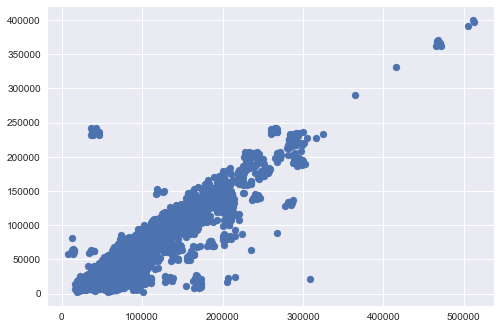

In [24]:
plt.scatter(combi['VALUE'],combi['DUE_MORTGAGE'])

In [25]:
combi.loc[combi['VAR_2'] > 7,'VAR_2'] = 8
combi.loc[combi['VAR_1'] > 3,'VAR_1'] = 4

Treating Missing Value

In [26]:
combi['VALUE'].fillna(train[train['DEFAULTER'] == 1]['VALUE'].mean(),inplace=True)

In [27]:
combi['RATIO'].fillna(train[train['DEFAULTER'] == 1]['RATIO'].mean(),inplace=True)

In [28]:
combi['DCL'].fillna(combi['DCL'].mean(),inplace=True)

In [29]:
combi['TJOB'].fillna(combi['TJOB'].mean(),inplace=True)
combi['CLT'].fillna(combi['CLT'].mean(),inplace=True)
combi['CL_COUNT'].fillna(combi['CL_COUNT'].mean(),inplace=True)

In [30]:
test_mort = combi[combi['DUE_MORTGAGE'].isnull()]
train_mort = combi[~combi['DUE_MORTGAGE'].isnull()]

In [31]:
train_mort_x = train_mort['VALUE']
train_mort_Y = train_mort['DUE_MORTGAGE']
test_mort_x = test_mort['VALUE']
test_mort_Y = test_mort['DUE_MORTGAGE']

In [32]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(train_mort_x.reshape(-1, 1),train_mort_Y)

C:\Users\Akhand\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
prediction = model.predict(test_mort_x.reshape(-1, 1))

C:\Users\Akhand\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [34]:
# assigning values 
combi.loc[combi['DUE_MORTGAGE'].isnull(),'DUE_MORTGAGE'] = prediction

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [36]:
combi2 = combi
combi2.drop('DEFAULTER',axis = 1,inplace = True)
x_train_OCC = combi2[~combi2['OCC'].isnull()]
x_test_OCC = combi2[combi2['OCC'].isnull()]
y_train_OCC = x_train_OCC['OCC']
x_train_OCC1 = x_train_OCC
x_train_OCC1.drop(x_train_OCC1.columns[3:6],axis = 1,inplace = True)
x_test_OCC.drop(x_test_OCC.columns[3:6],axis = 1,inplace = True)

C:\Users\Akhand\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Akhand\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [37]:
Model = DecisionTreeClassifier()
Model.fit(x_train_OCC1,y_train_OCC)
prediction = Model.predict(x_test_OCC)
combi.loc[combi['OCC'].isnull(),'OCC'] = prediction

In [38]:
x_train_rea = combi2[~combi2['REASON'].isnull()]
x_test_rea = combi2[combi2['REASON'].isnull()]
y_train_rea = x_train_rea['REASON']
x_train_rea1 = x_train_rea
x_train_rea1.drop(x_train_rea1.columns[3:5],axis = 1,inplace = True)
x_test_rea.drop(x_test_rea.columns[3:5],axis = 1,inplace = True)

C:\Users\Akhand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Akhand\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [39]:
Model = DecisionTreeClassifier()
Model.fit(x_train_rea1,y_train_rea)
prediction = Model.predict(x_test_rea)
combi.loc[combi['REASON'].isnull(),'REASON'] = prediction

In [40]:
pd.crosstab(combi['REASON'],combi['CONVICTED'])
pd.crosstab(combi['OCC'],combi['CONVICTED'])
pd.crosstab(train['OCC'],train['DEFAULTER'])
pd.crosstab(combi['REASON'],combi['OCC'])

OCC,0.0,1.0,2.0,3.0,4.0,5.0
REASON,,,,,,
0.0,807,325,12,180,451,116
1.0,1699,655,98,606,927,84


In [41]:
# Feature Engineering
combi['Excess'] = combi['VALUE'] - combi['DUE_MORTGAGE']
combi['%pay'] = combi['AMOUNT']/combi['Excess']
combi['CLT_year'] = combi['CLT']/12
combi['Income'] = combi['AMOUNT']/combi['RATIO']
combi['ratio D/I'] = combi['DUE_MORTGAGE']/combi['Income']

In [44]:
combi['CL_COUNT per Y'] = combi['CL_COUNT']/combi['CLT_year']

In [45]:
combi['AMOUNT'] = np.log(combi['AMOUNT'])
combi['VALUE'] = np.log(combi['VALUE'])
combi['DUE_MORTGAGE'] = np.log(combi['DUE_MORTGAGE'])

In [46]:
# splitting combi in to train and test.
trainf = combi.iloc[0:3576,:]
testf = combi.iloc[3576:,:]

In [47]:
# Dropping unrequired features
trainf.drop('LOAN_ID',axis = 1,inplace = True)
testf.drop('LOAN_ID',axis = 1,inplace = True)
trainf.drop('CLT', axis =1, inplace = True)
testf.drop('CLT', axis =1, inplace = True)

C:\Users\Akhand\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Akhand\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Akhand\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Akhand\Anaconda3\

In [48]:
# Splitting trainf for CV 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(trainf,train['DEFAULTER'],test_size = 0.25,random_state = 42,stratify=train['DEFAULTER'])

In [49]:
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,random_state = 42,n_estimators=300,max_depth = 20, oob_score = True) 

In [50]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [51]:
from sklearn import metrics
y_pred1 = rfc.predict_proba(x_test)
metrics.roc_auc_score(y_test,y_pred1[:,1])

0.93793190396268189

In [52]:
target = train['DEFAULTER']

In [53]:
rfc.fit(trainf,target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [54]:
predrf = rfc.predict_proba(testf)[:,1]

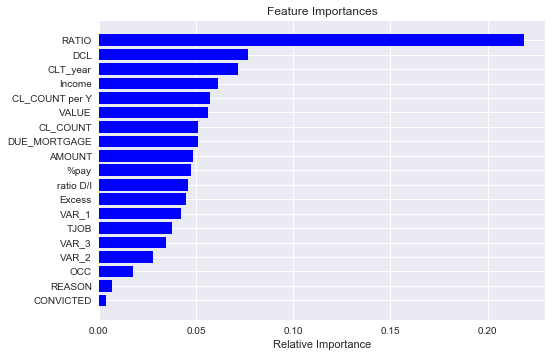

In [63]:
features = x_train.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

Now, training through XGBOOST

In [64]:
from xgboost import XGBClassifier

In [71]:
# fit model no training data
params={
    'n_estimators':200,
    'objective': 'binary:logistic',
    'learning_rate': 0.05,
    'gamma':0.1,
    'subsample':0.8,
    'colsample_bytree':0.3,
    'min_child_weight':3,
    'max_depth':8,
    'seed':1024,
    }

clf = XGBClassifier(**params)
clf.fit(x_train, y_train, \
        eval_set=[(x_train, y_train), (x_test, y_test)], \
                  eval_metric='auc', early_stopping_rounds = 50)

[0]	validation_0-auc:0.86616	validation_1-auc:0.860333
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.901126	validation_1-auc:0.86484
[2]	validation_0-auc:0.913669	validation_1-auc:0.87965
[3]	validation_0-auc:0.913993	validation_1-auc:0.878011
[4]	validation_0-auc:0.932057	validation_1-auc:0.892187
[5]	validation_0-auc:0.941166	validation_1-auc:0.908029
[6]	validation_0-auc:0.943434	validation_1-auc:0.906709
[7]	validation_0-auc:0.941538	validation_1-auc:0.907087
[8]	validation_0-auc:0.941241	validation_1-auc:0.908249
[9]	validation_0-auc:0.944991	validation_1-auc:0.908375
[10]	validation_0-auc:0.947415	validation_1-auc:0.907847
[11]	validation_0-auc:0.94806	validation_1-auc:0.907185
[12]	validation_0-auc:0.952482	validation_1-auc:0.913143
[13]	validation_0-auc:0.953358	validation_1-auc:0.912882
[14]	validation_0-auc:0.954781	validation_1-auc:0.911862
[1

[142]	validation_0-auc:0.997888	validation_1-auc:0.930052
[143]	validation_0-auc:0.997926	validation_1-auc:0.930186
[144]	validation_0-auc:0.997964	validation_1-auc:0.929958
[145]	validation_0-auc:0.998032	validation_1-auc:0.930557
[146]	validation_0-auc:0.99808	validation_1-auc:0.931155
[147]	validation_0-auc:0.998127	validation_1-auc:0.931061
[148]	validation_0-auc:0.998187	validation_1-auc:0.931084
[149]	validation_0-auc:0.998248	validation_1-auc:0.931305
[150]	validation_0-auc:0.998268	validation_1-auc:0.931155
[151]	validation_0-auc:0.998333	validation_1-auc:0.931494
[152]	validation_0-auc:0.998373	validation_1-auc:0.931865
[153]	validation_0-auc:0.998368	validation_1-auc:0.931928
[154]	validation_0-auc:0.998438	validation_1-auc:0.932077
[155]	validation_0-auc:0.998454	validation_1-auc:0.932046
[156]	validation_0-auc:0.998495	validation_1-auc:0.932298
[157]	validation_0-auc:0.998515	validation_1-auc:0.932377
[158]	validation_0-auc:0.99858	validation_1-auc:0.932755
[159]	validation

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.3,
       gamma=0.1, learning_rate=0.05, max_delta_step=0, max_depth=8,
       min_child_weight=3, missing=None, n_estimators=200, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=1024, silent=True, subsample=0.8)

In [72]:
# make predictions for test data
y_pred = clf.predict_proba(x_test)[:,1]

In [73]:
metrics.roc_auc_score(y_test,y_pred)

0.9343624171650553

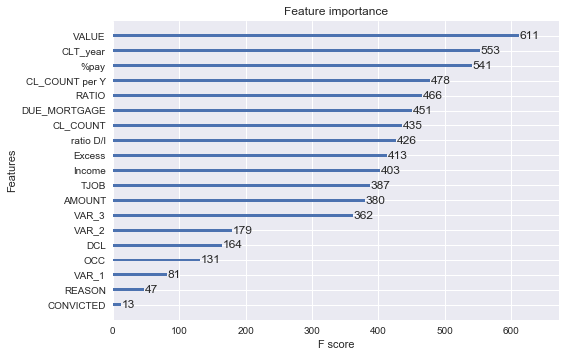

In [74]:
from xgboost import plot_importance
plot_importance(clf)
pyplot.show()

In [75]:
clf.fit(trainf,target)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.3,
       gamma=0.1, learning_rate=0.05, max_delta_step=0, max_depth=8,
       min_child_weight=3, missing=None, n_estimators=200, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=1024, silent=True, subsample=0.8)

In [76]:
pred = clf.predict_proba(testf)[:,1]

Using Ensemble 

In [77]:
pred = predrf*0.4 + pred*0.6

In [79]:
# Make submission file and submit
submission = pd.DataFrame({'LOAN_ID':test['LOAN_ID'],'DEFAULTER':pred},columns=['LOAN_ID','DEFAULTER'])
submission.to_csv('Technex3.csv', index = False)